# Dynamic growth of Python list and array

- Here, we start with a Python list of size `N` and grow it to size `2N` through repeated append operations
- The same is repeated for a Python array

In [1]:
import sys
from array import array
%matplotlib inline
import matplotlib.pyplot as plt
import numpy


In [2]:
def analyze_overalloc(a, N):
    fig = plt.figure(figsize=(6, 7), dpi=120)
    cpt_prev = 0
    print("\n{} ---------------------------------------------------".format(type(a)))
    length = []
    capacity = []

    for k in range(N):
        if type(a) is array:
            fac = 1.0625
            ofs = 7
            zerosize = 64
            unitsize = a.itemsize
        elif type(a) is list:
            fac = 1.125
            ofs = 6
            zerosize = 56
            unitsize = 8
    
        expfunc = lambda x : int(fac * x + ofs)
        sz = sys.getsizeof(a)
        cpt = int((sz - ofs) / unitsize)
        length.append(len(a))
        capacity.append(cpt)
        if (cpt != cpt_prev) and (cpt_prev != 0):
            try:
                r = cpt / len(a)
            except ZeroDivisionError:
                r = float("NaN")
            print("{}\t{}\t{:.4f}\t{}".format(len(a), cpt, r, expfunc(len(a))))           
        cpt_prev = cpt

        a.append(0)

    plt.loglog(length, capacity, "o-", lw=1, ms=2)
    plt.plot(length, length, "--", lw=1)
    plt.plot(length, [expfunc(g) for g in length], "--", lw=1)
    plt.grid(True, "both")
    plt.title("{} overallocation strategy".format(type(a)))
    plt.xlabel("Structure length")
    plt.ylabel("Structure capacity (includes overallocation)")
    plt.legend((type(a), "Over-alloc factor = 0" , "Over-alloc factor = {}".format(fac)), loc="upper left")
    plt.axis('equal')


In [3]:
def analyze_overalloc_amort(a, N):
    fig = plt.figure(figsize=(6, 4), dpi=120)
    cpt_prev = 0
    print("\n{} ---------------------------------------------------".format(type(a)))
    length = []
    capacity = []

    for k in range(N):
        if type(a) is array:
            fac = 1.0625
            ofs = 7
            zerosize = 64
            unitsize = a.itemsize
        elif type(a) is list:
            fac = 1.125
            ofs = 6
            zerosize = 56
            unitsize = 8
    
        expfunc = lambda x : int(fac * x + ofs)
        sz = sys.getsizeof(a)
        cpt = int((sz - ofs) / unitsize)
        length.append(len(a))
        capacity.append(cpt)
        if (cpt != cpt_prev) and (cpt_prev != 0):
            try:
                r = cpt / len(a)
            except ZeroDivisionError:
                r = float("NaN")
            print("{}\t{}\t{:.4f}\t{}".format(len(a), cpt, r, expfunc(len(a))))           
        cpt_prev = cpt

        a.append(0)

    dd = numpy.diff(capacity)
    plt.semilogy(length[:-1], 100 * dd / numpy.max(dd), "o-", lw=1, ms=2)
    plt.plot(length, numpy.array(capacity) / length, "-", lw=3)
    plt.axhline(numpy.mean(numpy.diff(capacity)), lw=2, ls="-", color="black")

    plt.grid(True, "both")
    plt.title("{} append cost".format(type(a)))
    plt.xlabel("Structure length")
    plt.ylabel("Cost")
    plt.legend(("Transaction cost", "Average cost" , "Over-alloc factor = {}".format(fac)))


# Amortized complexity

In [2]:
def analyze_overalloc(a, N):
    fig = plt.figure(figsize=(6, 7), dpi=120)
    cpt_prev = 0
    print("\n{} ---------------------------------------------------".format(type(a)))
    length = []
    capacity = []

    for k in range(N):
        if type(a) is array:
            fac = 1.0625
            ofs = 7
            zerosize = 64
            unitsize = a.itemsize
        elif type(a) is list:
            fac = 1.125
            ofs = 6
            zerosize = 56
            unitsize = 8
    
        expfunc = lambda x : int(fac * x + ofs)
        sz = sys.getsizeof(a)
        cpt = int((sz - ofs) / unitsize)
        length.append(len(a))
        capacity.append(cpt)
        if (cpt != cpt_prev) and (cpt_prev != 0):
            try:
                r = cpt / len(a)
            except ZeroDivisionError:
                r = float("NaN")
            print("{}\t{}\t{:.4f}\t{}".format(len(a), cpt, r, expfunc(len(a))))           
        cpt_prev = cpt

        a.append(0)

    plt.loglog(length, capacity, "o-", lw=1, ms=2)
    plt.plot(length, length, "--", lw=1)
    plt.plot(length, [expfunc(g) for g in length], "--", lw=1)
    plt.grid(True, "both")
    plt.title("{} overallocation strategy".format(type(a)))
    plt.xlabel("Structure length")
    plt.ylabel("Structure capacity (includes overallocation)")
    plt.legend((type(a), "Over-alloc factor = 0" , "Over-alloc factor = {}".format(fac)), loc="upper left")
    plt.axis('equal')


In [2]:
def analyze_overalloc(a, N):
    fig = plt.figure(figsize=(6, 7), dpi=120)
    cpt_prev = 0
    print("\n{} ---------------------------------------------------".format(type(a)))
    length = []
    capacity = []

    for k in range(N):
        if type(a) is array:
            fac = 1.0625
            ofs = 7
            zerosize = 64
            unitsize = a.itemsize
        elif type(a) is list:
            fac = 1.125
            ofs = 6
            zerosize = 56
            unitsize = 8
    
        expfunc = lambda x : int(fac * x + ofs)
        sz = sys.getsizeof(a)
        cpt = int((sz - ofs) / unitsize)
        length.append(len(a))
        capacity.append(cpt)
        if (cpt != cpt_prev) and (cpt_prev != 0):
            try:
                r = cpt / len(a)
            except ZeroDivisionError:
                r = float("NaN")
            print("{}\t{}\t{:.4f}\t{}".format(len(a), cpt, r, expfunc(len(a))))           
        cpt_prev = cpt

        a.append(0)

    plt.loglog(length, capacity, "o-", lw=1, ms=2)
    plt.plot(length, length, "--", lw=1)
    plt.plot(length, [expfunc(g) for g in length], "--", lw=1)
    plt.grid(True, "both")
    plt.title("{} overallocation strategy".format(type(a)))
    plt.xlabel("Structure length")
    plt.ylabel("Structure capacity (includes overallocation)")
    plt.legend((type(a), "Over-alloc factor = 0" , "Over-alloc factor = {}".format(fac)), loc="upper left")
    plt.axis('equal')


In [6]:
def multi_append(typ, N1, N2):
    if typ is list:
        a = list(range(N1))
    elif typ is array:
        a = array('i', range(N1))
    for k in range(N2-N1):
        a.append(0)

In [7]:
def analyze_amortization(N):
    dt1 = []
    dt2 = []
    for n in N:
        dt = %timeit -o multi_append(list, N[0], n)
        dt1.append(dt)
        dt = %timeit -o multi_append(array, N[0], n)
        dt2.append(dt)
    return dt1, dt2


## Results

- It can be seen that once the list is full to its allocated capacity, it is again overallocated by a factor of __1.125__
- Similary, the array is overallocated by a factor of __1.0625__
- Since the overallocation is a geometric progression, the amortized cost of repeated appends will be __O(1)__


<class 'list'> ---------------------------------------------------
100001	112513	1.1251	112507
112508	126583	1.1251	126577
126578	142412	1.1251	142406
142407	160219	1.1251	160213
160214	180252	1.1251	180246
180247	202789	1.1251	202783

<class 'array.array'> ---------------------------------------------------
100001	106272	1.0627	106258
106259	112921	1.0627	112907
112908	119985	1.0627	119971
119972	127491	1.0627	127477
127478	135466	1.0627	135452
135453	143939	1.0626	143925
143926	152942	1.0626	152928
152929	162508	1.0626	162494
162495	172671	1.0626	172657
172658	183470	1.0626	183456
183457	194944	1.0626	194930
194931	207135	1.0626	207121


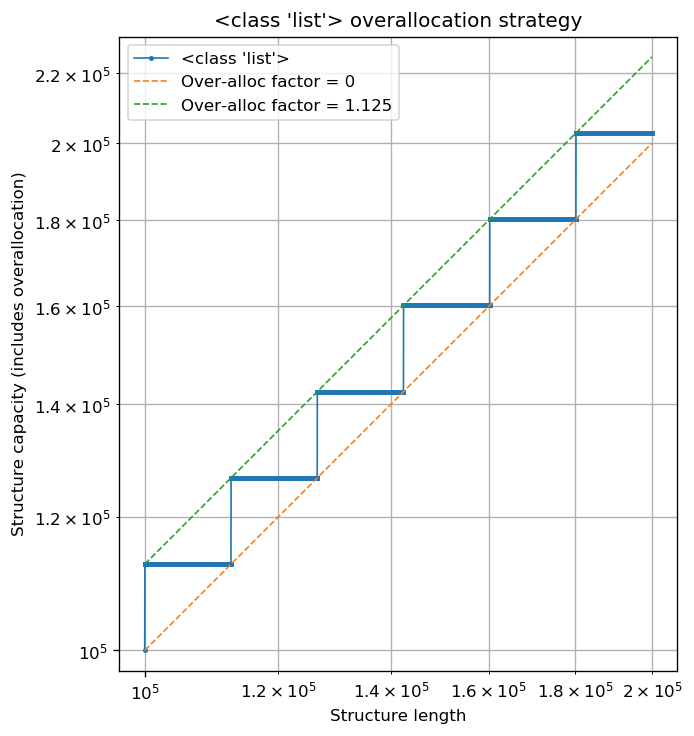

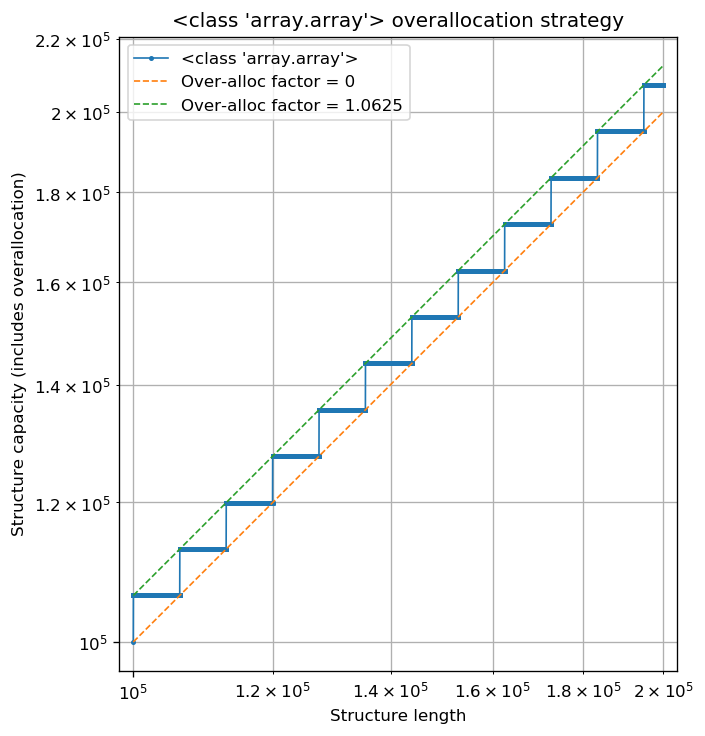

In [4]:
N = int(1e5)
b = list(range(N))
for a in (b, array('i', b)):
    analyze_overalloc(a, int(N))



<class 'list'> ---------------------------------------------------
100001	112513	1.1251	112507
112508	126583	1.1251	126577
126578	142412	1.1251	142406
142407	160219	1.1251	160213
160214	180252	1.1251	180246
180247	202789	1.1251	202783
202784	228144	1.1251	228138
228139	256668	1.1251	256662
256663	288757	1.1250	288751
288752	324858	1.1250	324852
324853	365471	1.1250	365465
365466	411161	1.1250	411155
411156	462562	1.1250	462556
462557	520388	1.1250	520382
520383	585442	1.1250	585436
585437	658628	1.1250	658622


/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


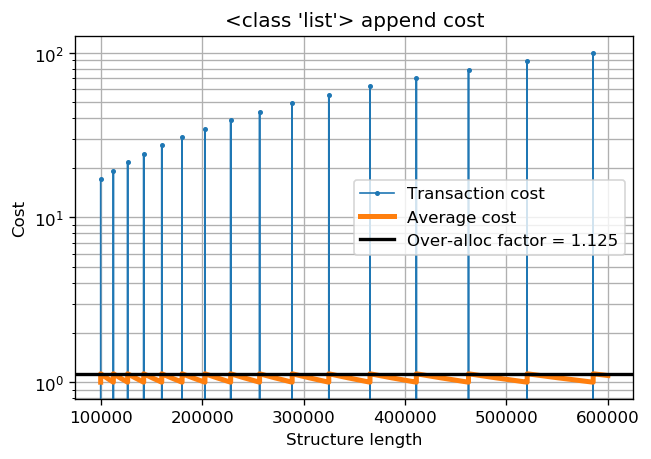

In [5]:
N = int(1e5)
a = list(range(N))
analyze_overalloc_amort(a, int(N)*5)


In [8]:
n1 = 1e4
n2 = 1e5
count = 10
N = numpy.logspace(numpy.log10(n1), numpy.log10(n2), count, dtype=int)
N = numpy.linspace(n1, n2, count, dtype=int)
print(N)
dt1,dt2 = analyze_amortization(N)


[ 10000  20000  30000  40000  50000  60000  70000  80000  90000 100000]
150 µs ± 4.27 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
572 µs ± 12.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
596 µs ± 49.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.4 ms ± 16.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
953 µs ± 36.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.11 ms ± 26.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.38 ms ± 25.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.06 ms ± 297 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.77 ms ± 20.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.68 ms ± 36.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.29 ms ± 195 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.47 ms ± 28.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.86 ms ± 235 µs per loop (mean ± std. dev. of 7 runs, 100 loop

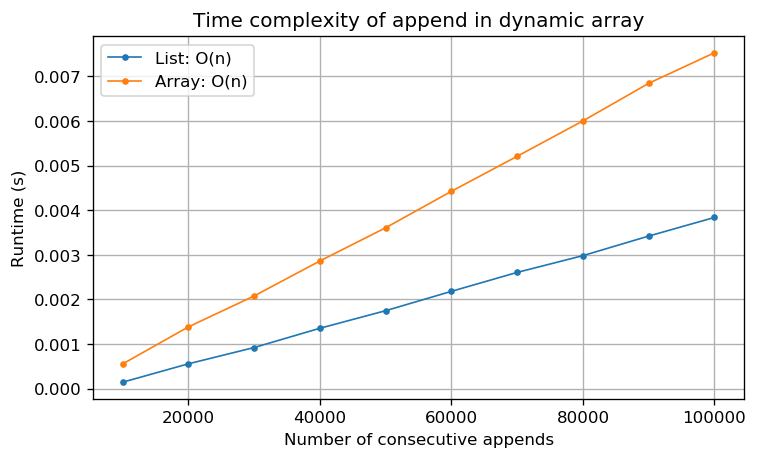

In [17]:
fig = plt.figure(figsize=(7, 4), dpi=120)
plt.plot(N, [t.best for t in dt1], "o-", lw=1, ms=3)
plt.plot(N, [t.best for t in dt2], "o-", lw=1, ms=3)
plt.grid(True)
plt.legend(("List: O(n)", "Array: O(n)"))
plt.title("Time complexity of append in dynamic array")
plt.xlabel("Number of consecutive appends")
plt.ylabel("Runtime (s)")
pass
